In [1]:
import pandas as pd

df = pd.DataFrame([
    ['green', 'M', '10.1', 'class1'],
    ['red', 'L', '13.5', 'class2'],
    ['blue', 'XL', '15.3', 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [2]:
size_mapping = {
    'XL': 3,
    'L': 2,
    'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [4]:
inv_size_mapping = {v:k for k,v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

In [5]:
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [6]:
import numpy as np

class_mapping = {label:idx for idx, label in
                enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [7]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [9]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [10]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0], dtype=int64)

In [11]:
class_le.inverse_transform(y)

c:\users\zhuowu\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array(['class1', 'class2', 'class1'], dtype=object)

In [13]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, '10.1'],
       [2, 2, '13.5'],
       [0, 3, '15.3']], dtype=object)

In [14]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [16]:
pd.get_dummies(df[['price', 'color', 'size']])

,size,price_10.1,price_13.5,price_15.3,color_blue,color_green,color_red
0,1,1,0,0,0,1,0
1,2,0,1,0,0,0,1
2,3,0,0,1,1,0,0


In [17]:
df_wine = pd.read_csv('wine_data.csv')
df_wine.columns = ['Class label', 'Alcohol', 
                  'Malic acid', 'Ash',
                  'Alcalinity of ash', 'Magnesium',
                  'Total phenols', 'Flavanoids',
                  'Nonflavanoid phenols', 'Proanthocyanins',
                  'Color intensity', 'Hue',
                  'OD280/OD315 of diluted wines',
                  'Proline']
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [18]:
df_wine.head

<bound method NDFrame.head of      Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0              1    13.20        1.78  2.14               11.2        100   
1              1    13.16        2.36  2.67               18.6        101   
2              1    14.37        1.95  2.50               16.8        113   
3              1    13.24        2.59  2.87               21.0        118   
4              1    14.20        1.76  2.45               15.2        112   
5              1    14.39        1.87  2.45               14.6         96   
6              1    14.06        2.15  2.61               17.6        121   
7              1    14.83        1.64  2.17               14.0         97   
8              1    13.86        1.35  2.27               16.0         98   
9              1    14.10        2.16  2.30               18.0        105   
10             1    14.12        1.48  2.32               16.8         95   
11             1    13.75        1.73  2.41   

In [20]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [21]:
ex = np.array([0, 1, 2, 3, 4, 5])
print('Standardized: ', (ex - ex.mean())/ex.std())
print(('Normalized:', (ex - ex.min())/(ex.max()-ex.min())))

Standardized:  [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
('Normalized:', array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]))


In [23]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0)
lr.fit(X_train_std, y_train)
print("Training accuracy: " , lr.score(X_train_std, y_train))
print("Test accuracy: " , lr.score(X_test_std, y_test))

Training accuracy:  1.0
Test accuracy:  0.9814814814814815


In [26]:
lr.intercept_

array([-1.27159003, -1.46052354, -2.24848949])

In [27]:
lr.coef_

array([[ 1.05160174,  0.30367127,  0.17398168, -0.64330424,  0.        ,
         0.        ,  1.17108649,  0.        ,  0.        ,  0.        ,
         0.        ,  0.69748592,  3.13099643],
       [-1.08367173, -0.57823561, -0.45603117,  0.08442115, -0.13671913,
         0.05484033,  0.57864928,  0.        ,  0.13457285, -1.9877204 ,
         0.91255318,  0.        , -2.99165172],
       [ 0.16292729,  0.11432326,  0.34184394,  0.        ,  0.        ,
         0.        , -2.55587708,  0.        ,  0.        ,  1.5801097 ,
        -0.90065178, -0.39879688,  0.        ]])

TypeError: 'list' object cannot be interpreted as an integer

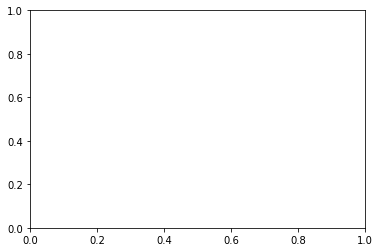

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan','magenta', 'yellow',
         'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params =[], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1], colors)):
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

In [42]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

class SBS():
    
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, X_test, y_train, y_test, self.indices_)
        self.scores_ = [score]
        
        while dim > self.k_features:
            scores = []
            subsets =[]
            
            for p in combinations(self.indices_, r=dim -1):
                score = self._calc_score(X_train, X_test, y_train, y_test, p)
                scores.append(score)
                subsets.append(p)
                
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -=1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, X_test, y_train, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [44]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

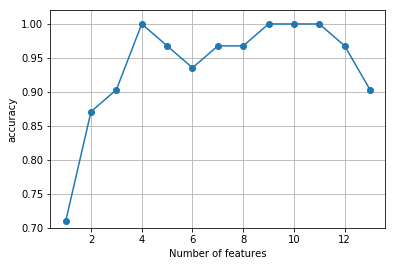

In [45]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [46]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d") %-*s %f" % (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout
plt.show()

SyntaxError: invalid syntax (<ipython-input-46-3875ecb1486b>, line 11)